In [2]:
import copy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import seaborn as sns
from typing import Optional

[12 12 12 12 12 12 12] [12 12 12 12 12 12 12]


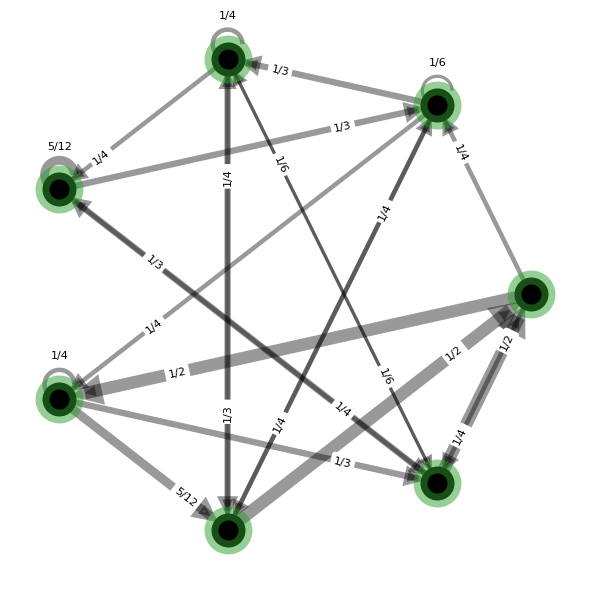

In [121]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
import numpy as np
from math import gcd

def build_uniform_circulation_7():
  G = nx.DiGraph()
  G.add_nodes_from(range(7))
  denom = 12

  Wnum = [
    [0, 3, 0, 0, 6, 0, 3],
    [0, 2, 4, 0, 3, 3, 0],
    [0, 0, 3, 3, 0, 4, 2],
    [0, 4, 0, 5, 0, 0, 3],
    [0, 0, 0, 0, 3, 5, 4],
    [6, 3, 3, 0, 0, 0, 0],
    [6, 0, 2, 4, 0, 0, 0],
  ]
  W = np.array(Wnum)
  print(W.sum(axis=1), W.sum(axis=0))

  for u in range(7):
    for v in range(7):
      k = Wnum[u][v]
      if k > 0:
        G.add_edge(u, v, weight=k / denom, k_num=k, k_den=denom)
  return G

def reduced_fraction_str(k, d):
  g = gcd(k, d)
  k_r, d_r = k // g, d // g
  if d_r == 1:
    return f"{k_r}"
  return f"{k_r}/{d_r}"

def draw_weighted_digraph_fraction_labels_head(G):
  pos = nx.circular_layout(G)

  edges = list(G.edges())
  weights = [G[u][v]['weight'] for u, v in edges]
  max_w = max(weights)
  widths = 1.4**np.array([0.5 + 6.0 * (w / max_w) for w in weights])
  width_map = dict(zip(edges, widths))

  fig, ax = plt.subplots(figsize=(6, 6))

  OPAQUENESS = .5
  palette = sns.color_palette('tab10')
  nx.draw_networkx_nodes(
    G,
    pos,
    node_size=600,
    ax=ax,
    node_color='black',
    # edge_color='grey',
    edgecolors=(*palette[2], OPAQUENESS),
    linewidths=10,
    node_shape='o',
  )
  # nx.draw_networkx_labels(G, pos, ax=ax)

  non_self_edges = [(u, v) for (u, v) in edges if u != v]
  self_loops = [(u, v) for (u, v) in edges if u == v]

  EDGE_OPAQUENESS = .4
  edge_patches = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=non_self_edges,
    width=[width_map[e] for e in non_self_edges],
    arrowstyle='-|>',
    arrowsize=20,
    connectionstyle='arc3,rad=0.0',
    edge_color=(0, 0, 0, EDGE_OPAQUENESS),
    ax=ax,
  )

  if edge_patches is not None:
    for patch in edge_patches:
      try:
        patch.set_capstyle('butt')
        patch.set_joinstyle('miter')
      except Exception:
        pass

  for (u, v) in self_loops:
    x, y = pos[u]
    loop_radius = 0.12
    loop = patches.Arc(
      (x, y + loop_radius / 2),
      width=loop_radius,
      height=loop_radius,
      angle=0,
      theta1=0,
      theta2=300,
      linewidth=width_map[(u, v)],
      color=(0, 0, 0, EDGE_OPAQUENESS),
    )
    ax.add_patch(loop)

  for (u, v) in edges:
    data = G[u][v]
    k = data['k_num']
    d = data['k_den']
    label = reduced_fraction_str(k, d)

    x1, y1 = pos[u]
    x2, y2 = pos[v]

    if u == v:
      lx, ly = x1, y1 + 0.18
      angle = 0
    else:
      dx, dy = x2 - x1, y2 - y1
      angle_rad = np.arctan2(dy, dx)
      while angle_rad > np.pi/2: angle_rad -= np.pi
      while angle_rad < -np.pi/2: angle_rad += np.pi
      angle = np.degrees(angle_rad)
      length = np.hypot(dx, dy)
      if length == 0:
        length = 1.0

      t = 0.75
      px, py = x1 + t * dx, y1 + t * dy

      nx_perp, ny_perp = -dy / length, dx / length
      offset = 0.00
      lx, ly = px + offset * nx_perp, py + offset * ny_perp

    ax.text(
      lx,
      ly,
      label,
      fontsize=8,
      ha='center',
      va='center',
      rotation=angle,
      rotation_mode='anchor',
      bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none')
    )

  ax.axis('off')
  fig.tight_layout()
  plt.show()
  return fig 

G = build_uniform_circulation_7()
fig = draw_weighted_digraph_fraction_labels_head(G)


In [119]:
fig.savefig(f'./pics/uniform-circulation.svg', transparent=True, bbox_inches='tight')